In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Home Audio
home_audio = pd.read_csv('HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [3]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [4]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop categorical variable columns
home_audio = home_audio.drop(['Year','Month','order_id','order_item_id','order_date'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-03-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-16-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,2015-10-20-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
# Drop categorical variable columns
home_audio = home_audio.drop(['month_date'], axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,Luxury,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


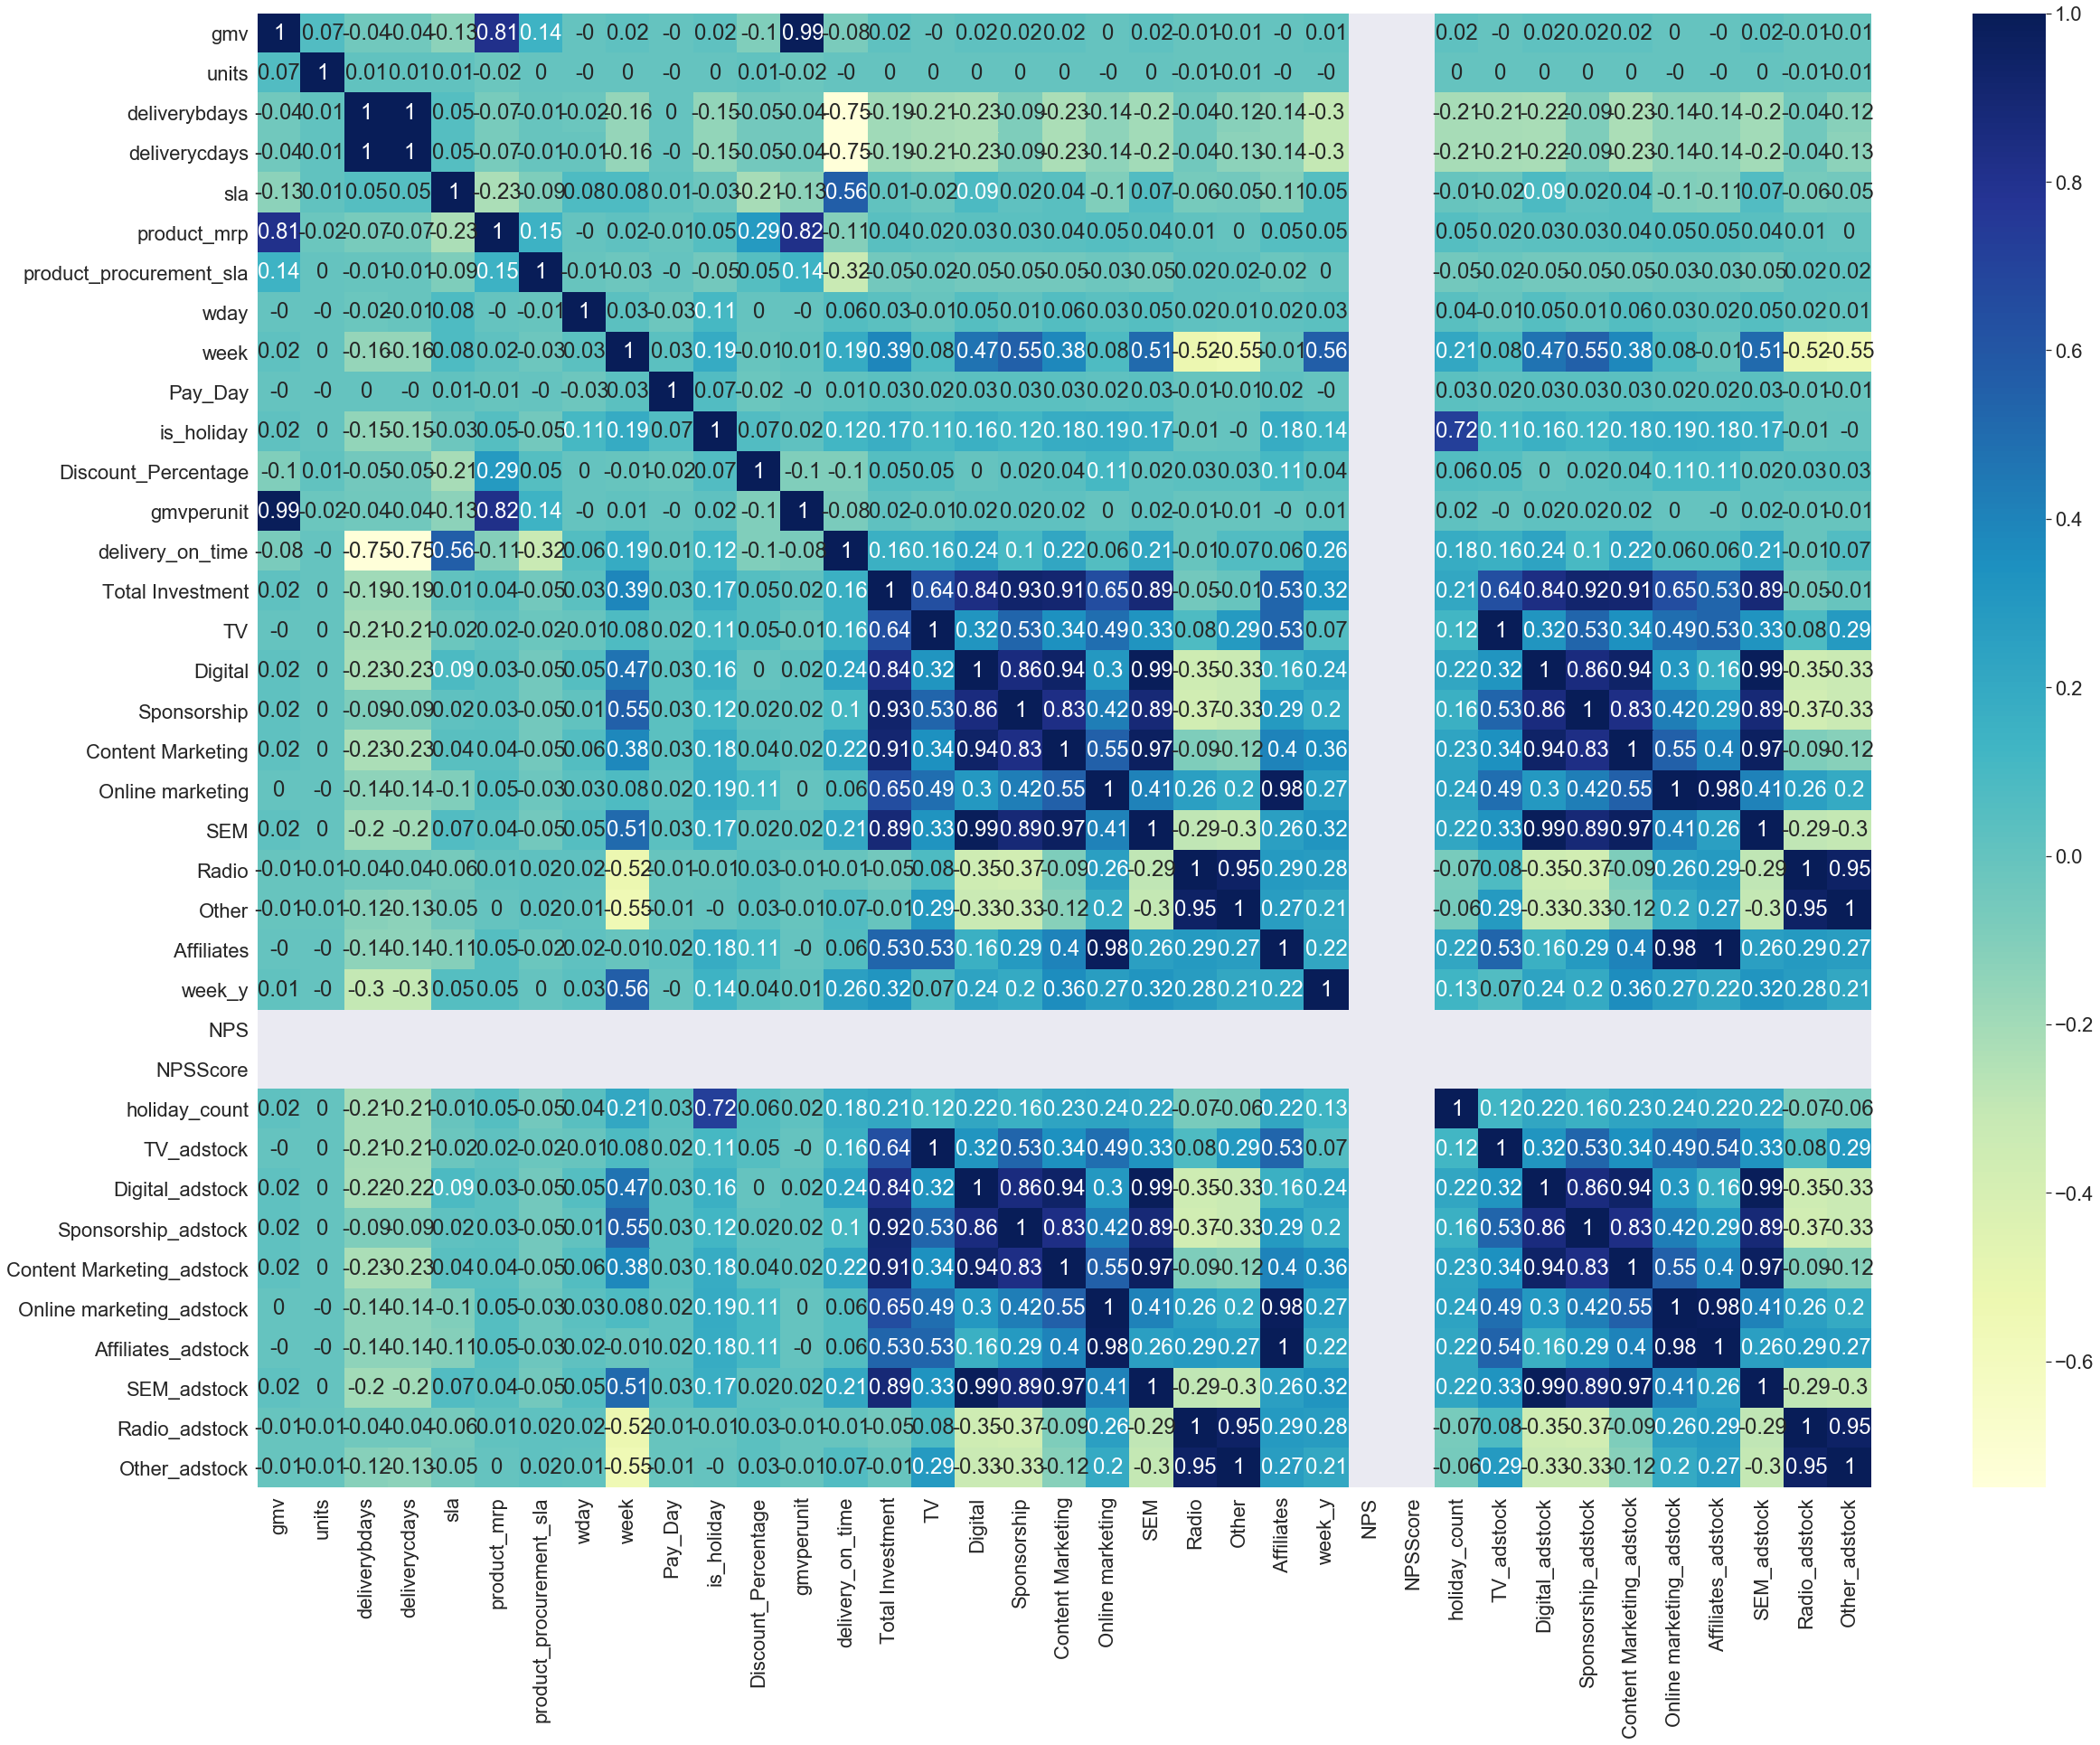

In [7]:
#plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [8]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,0.00,Luxury
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,4.00,Luxury
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,nan,nan,0.00,Luxury


In [9]:
home_audio.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'delivery_on_time', 'delivery_status',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Radio', 'Other', ' Affiliates', 'week_y',
       'NPS', 'NPSScore', 'holiday_count', 'ItemType'],
      dtype='object')

In [10]:
home_audio.isnull().sum()

gmv                                  0
units                                0
deliverycdays                        0
s1_fact_order_payment_type           0
sla                                  0
product_analytic_category            0
product_analytic_sub_category        0
product_analytic_vertical            0
product_mrp                          0
product_procurement_sla              0
wday                                 0
week                                 0
Pay_Day                              0
is_holiday                           0
special_sale                         0
Discount_Percentage                  0
delivery_on_time                     0
delivery_status                      0
Total Investment                     0
TV                                   0
Digital                              0
Sponsorship                          0
Content Marketing                    0
Online marketing                     0
SEM                                  0
Radio                    

In [11]:
home_audio['NPS'] = home_audio['NPS'].fillna(0)
home_audio['NPSScore'] = home_audio['NPSScore'].fillna(0)

In [12]:
home_audio.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
week                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
week_y              

In [13]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [14]:
home_audio.shape

(97387, 33)

In [15]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
home_audio.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
count,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00",...,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00"
mean,"2,193.18",1.01,0.84,5.66,"3,934.31",2.65,3.00,26.46,0.06,0.21,...,"2,200,441.85","43,139,493.17","22,741,042.80","1,089,306.58","11,597,821.02","13,594,024.21",29.96,0.00,0.00,1.20
std,"2,031.54",0.17,2.16,2.92,"3,630.33",1.41,1.94,17.40,0.24,0.41,...,"2,574,145.94","14,926,030.19","22,149,336.92","1,991,353.71","20,998,477.06","4,377,084.46",17.12,0.00,0.00,1.67
min,129.00,1.00,0.00,0.00,189.00,0.00,0.00,1.00,0.00,0.00,...,14.28,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",5.00,0.00,0.00,0.00
25%,"1,070.00",1.00,0.00,4.00,"1,735.00",1.00,1.00,10.00,0.00,0.00,...,"393,477.44","41,633,783.21","11,343,832.94",0.00,0.00,"14,039,892.47",13.00,0.00,0.00,0.00
50%,"1,999.00",1.00,0.00,5.00,"3,499.00",2.00,3.00,24.00,0.00,0.00,...,"1,440,481.70","48,016,056.55","11,763,933.86",0.00,0.00,"15,415,666.31",27.00,0.00,0.00,0.00
75%,"2,690.00",1.00,0.00,7.00,"5,399.00",4.00,5.00,44.00,0.00,0.00,...,"2,410,047.76","51,709,677.42","25,247,488.07","1,964,516.13","11,260,967.74","15,747,089.60",44.00,0.00,0.00,3.00
max,"75,000.00",19.00,28.00,41.00,"98,000.00",14.00,6.00,53.00,1.00,1.00,...,"7,776,943.00","55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",53.00,0.00,0.00,6.00


In [16]:
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [17]:
home_audio = home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count,ItemType
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00,Luxury
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury
8,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury
11,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00,Luxury
12,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00,Luxury


In [18]:
home_audio.shape

(62116, 33)

In [19]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [20]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
8,"6,850.00",1,0,6,"7,499.00",5,4,44,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
11,"6,700.00",1,0,6,"7,499.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
12,"6,900.00",1,0,6,"7,499.00",5,4,40,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00


In [21]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns),axis = 1)

In [24]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,week_y,NPS,NPSScore,holiday_count
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
8,"6,850.00",1,0,6,"7,499.00",5,4,44,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00
11,"6,700.00",1,0,6,"7,499.00",5,4,42,0,1,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,4.00
12,"6,900.00",1,0,6,"7,499.00",5,4,40,0,0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",40.00,0.00,0.00,0.00


In [25]:
# Concatenate dummy variables with X
ha = pd.concat([home_audio, dummies], axis=1)
ha.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,42,0,1,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,43,0,0,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,44,0,0,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,42,0,1,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,40,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   week                                        62116 non-null  int64  
 8   Pay_Day                                     62116 non-null  int64  
 9   is_holiday                                  62116 non-null  int64  
 10  Discount_P

In [27]:
#missing information
ha.isnull().any()

gmv                                           False
units                                         False
deliverycdays                                 False
sla                                           False
product_mrp                                   False
product_procurement_sla                       False
wday                                          False
week                                          False
Pay_Day                                       False
is_holiday                                    False
Discount_Percentage                           False
delivery_on_time                              False
Total Investment                              False
TV                                            False
Digital                                       False
Sponsorship                                   False
Content Marketing                             False
Online marketing                              False
SEM                                           False
Radio       

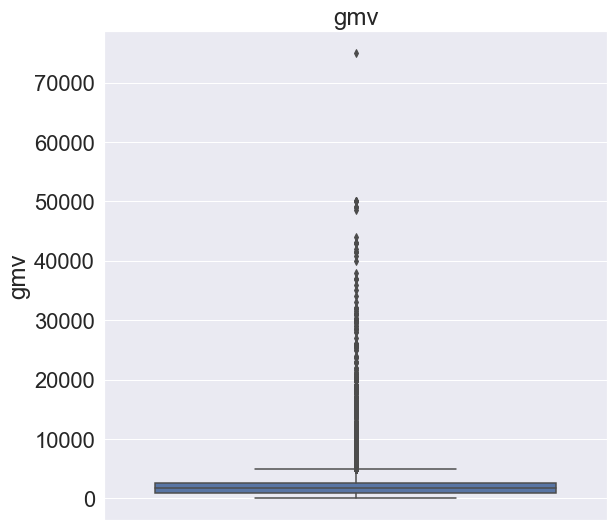

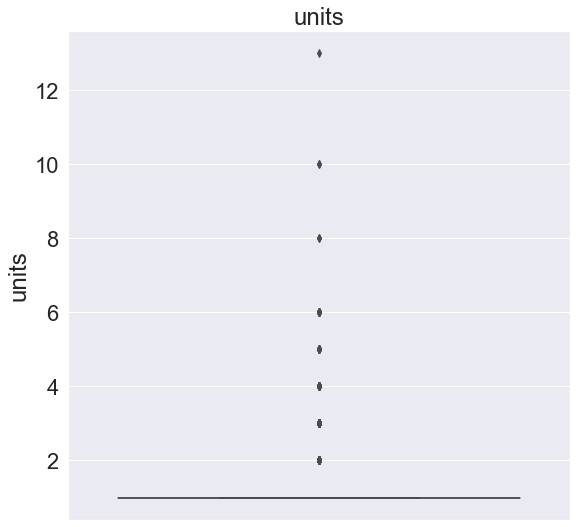

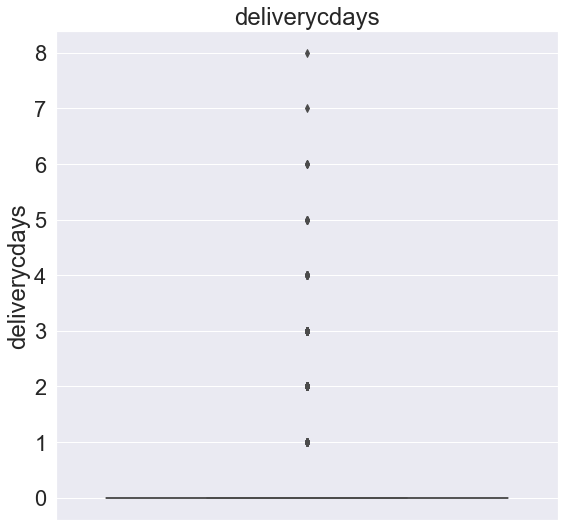

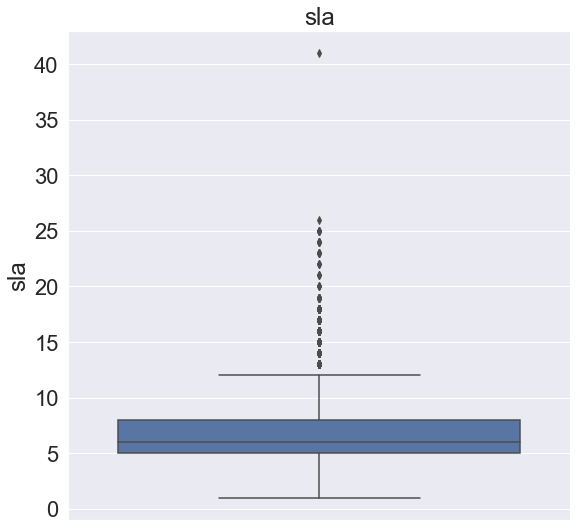

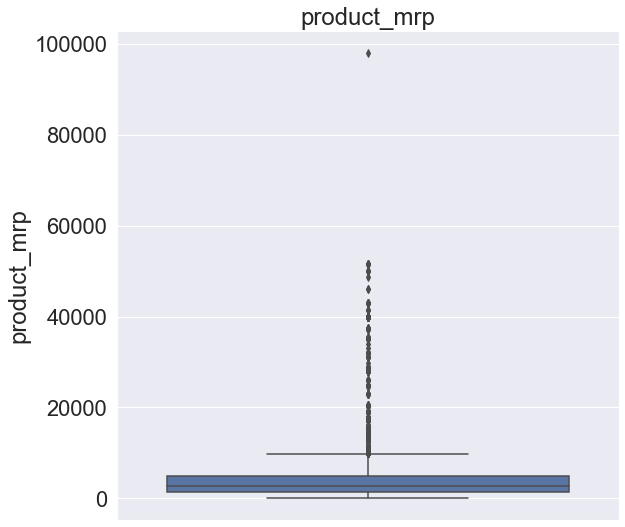

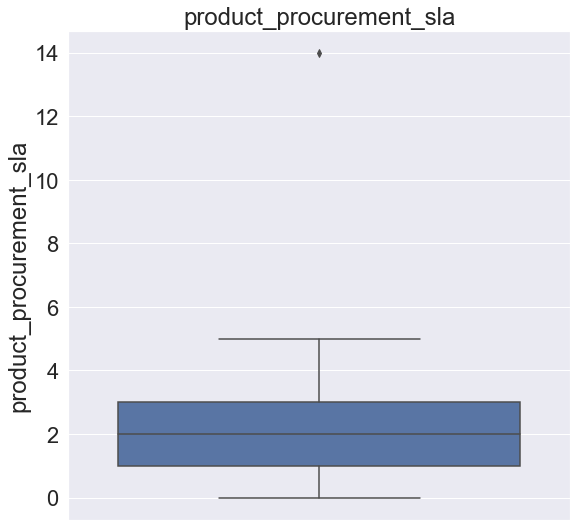

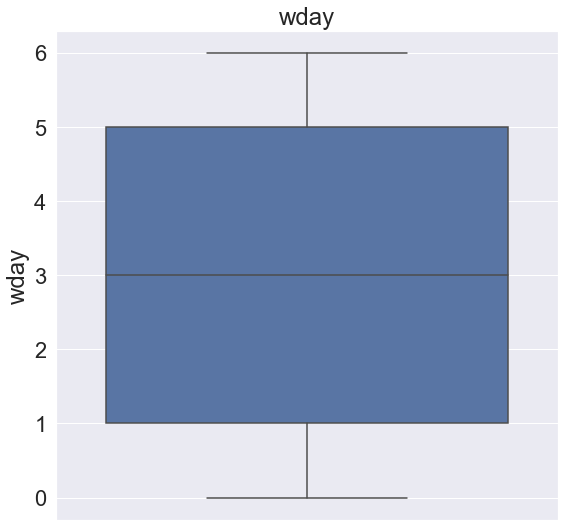

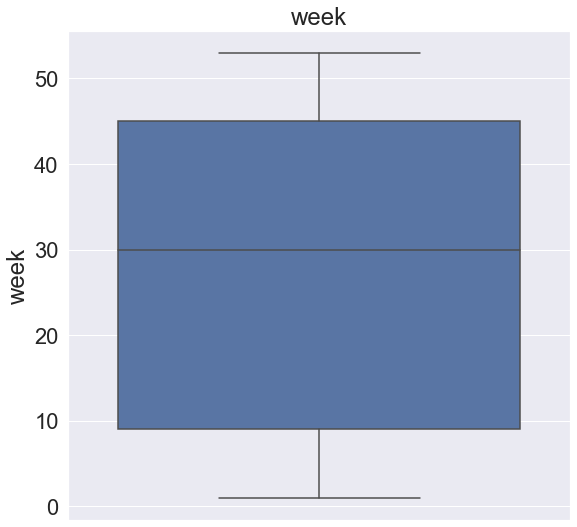

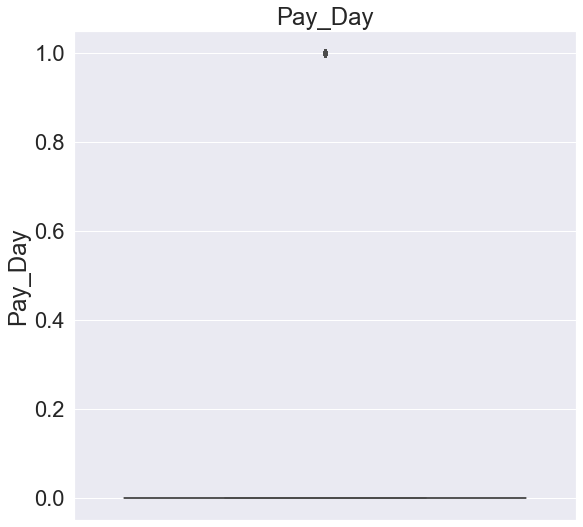

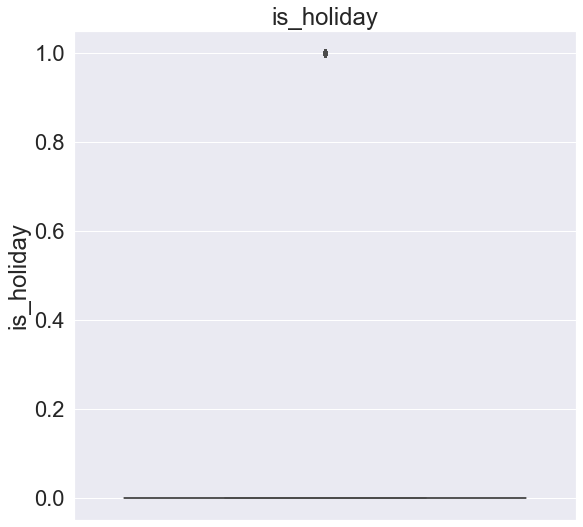

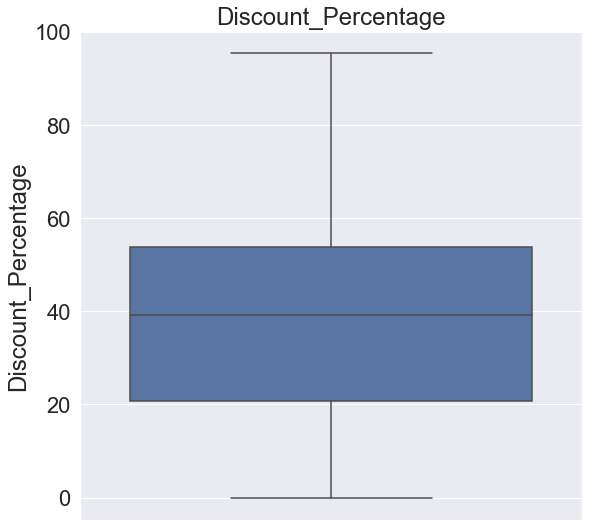

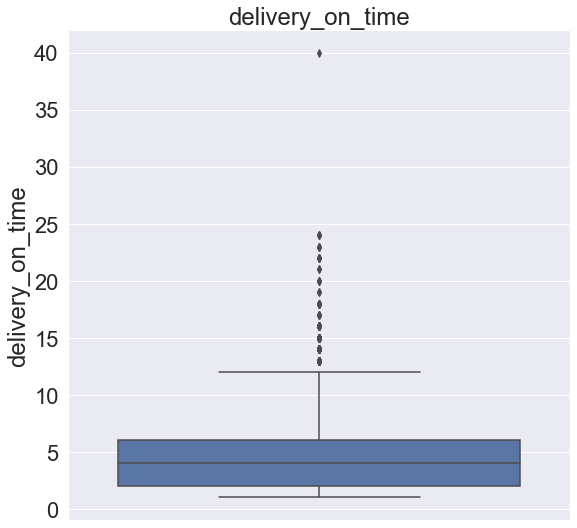

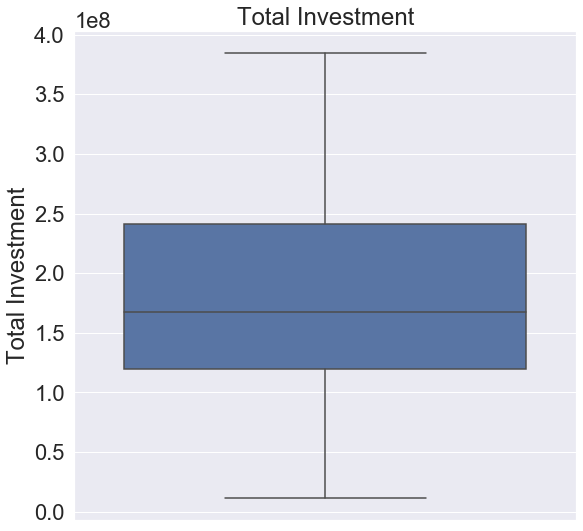

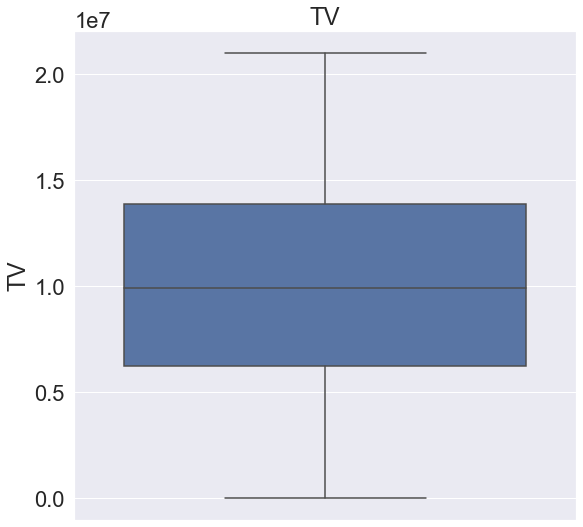

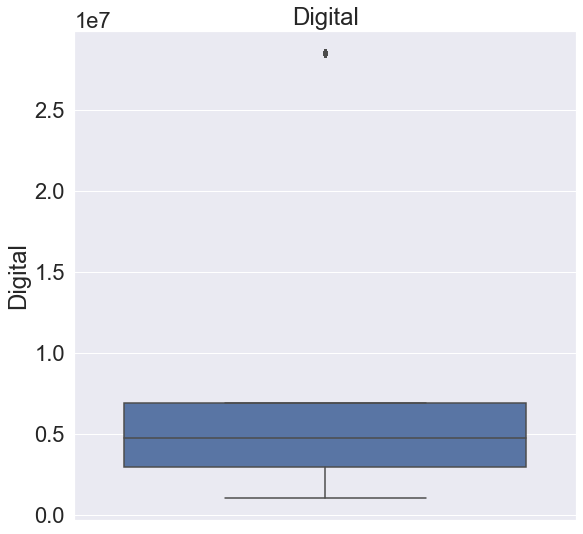

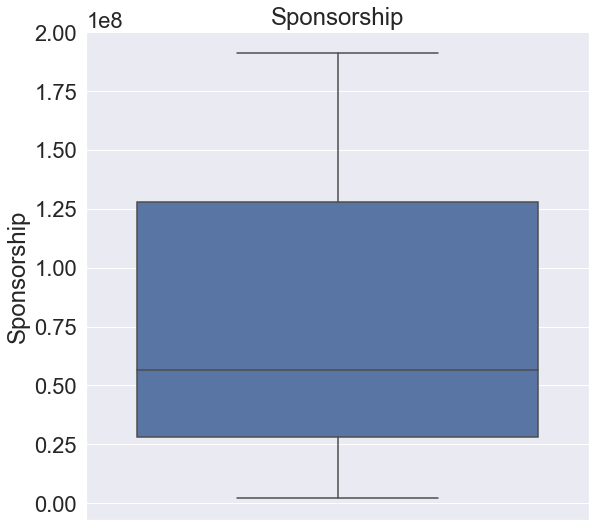

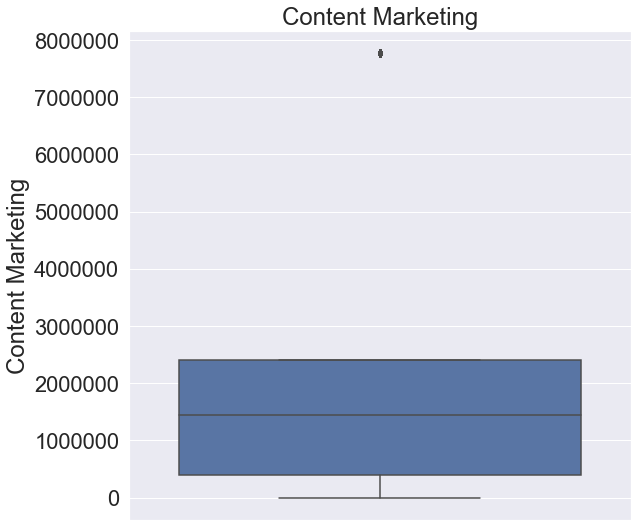

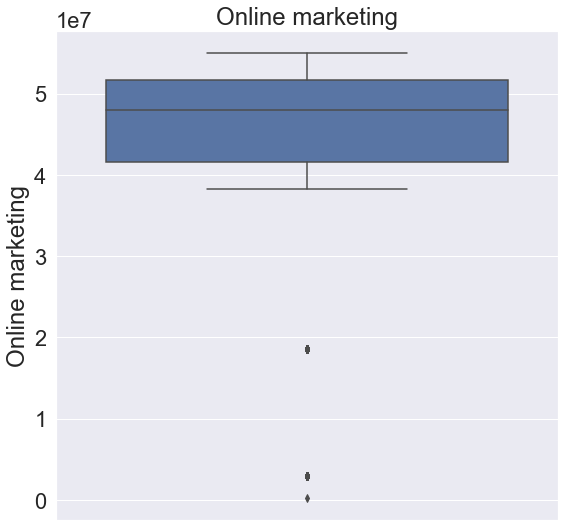

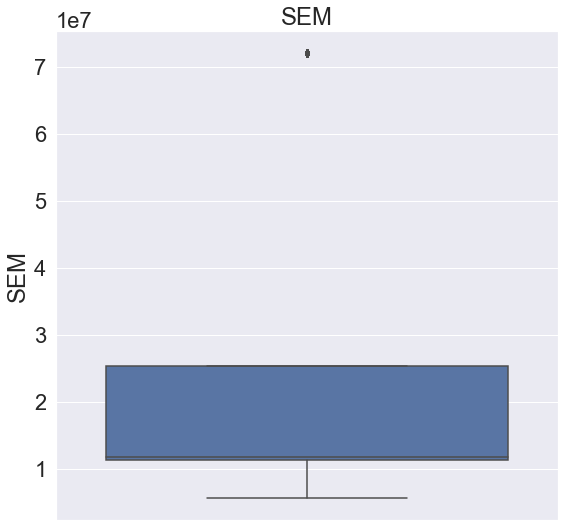

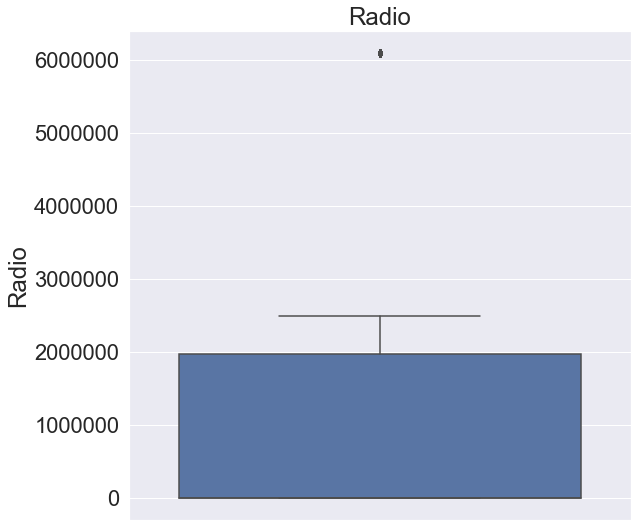

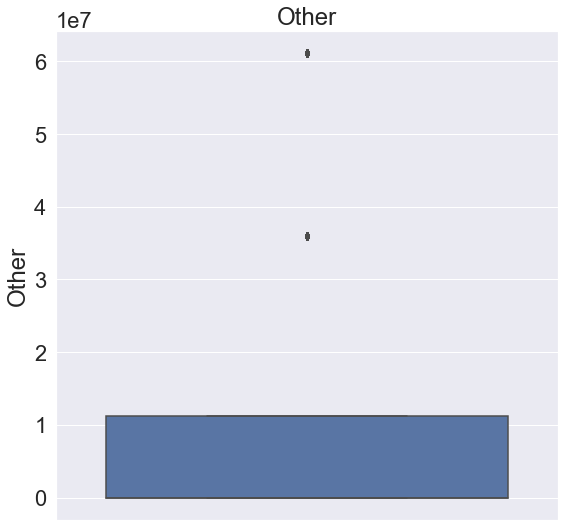

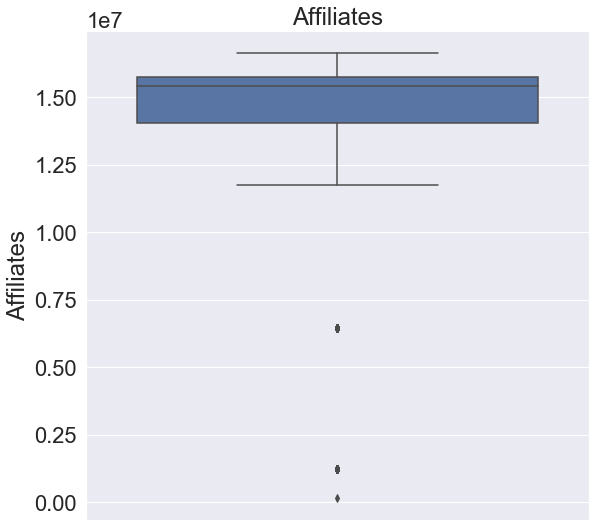

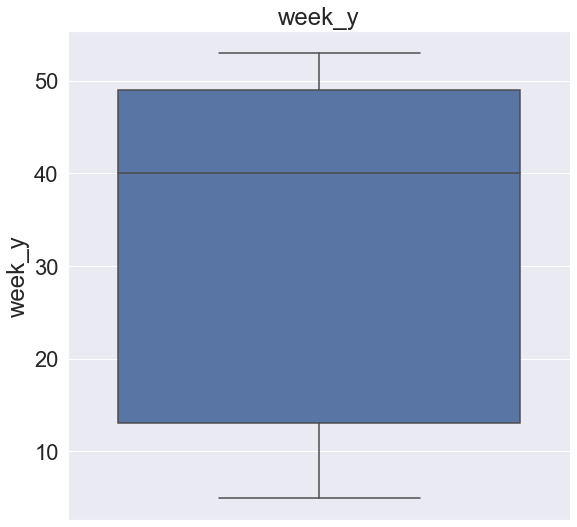

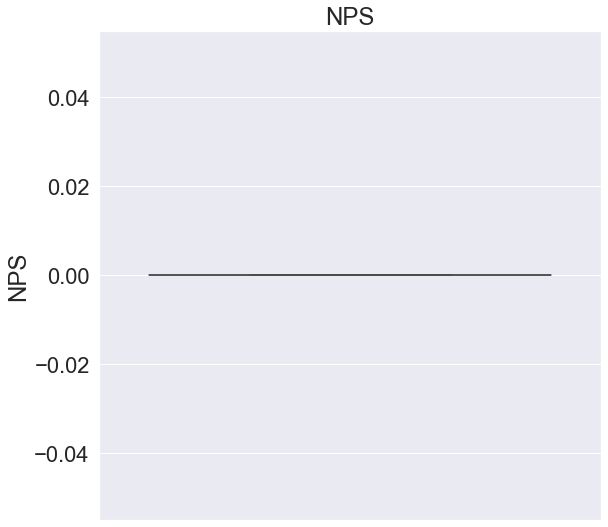

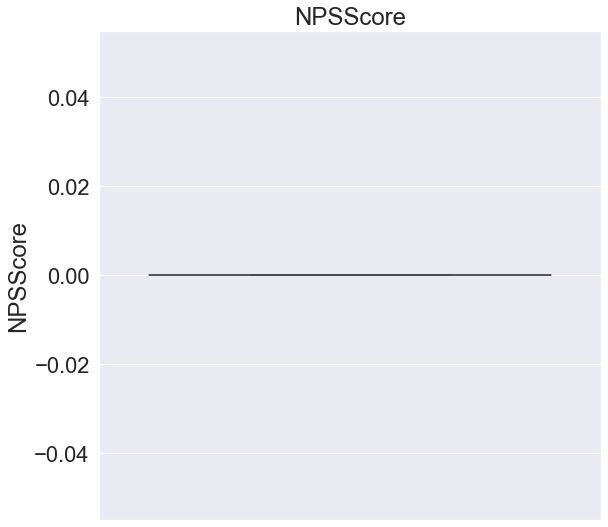

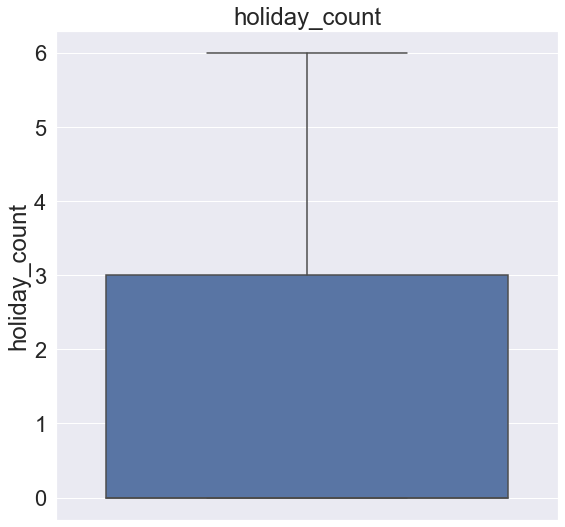

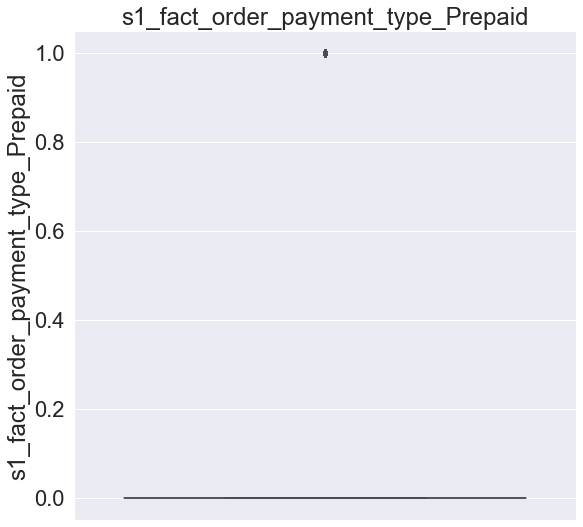

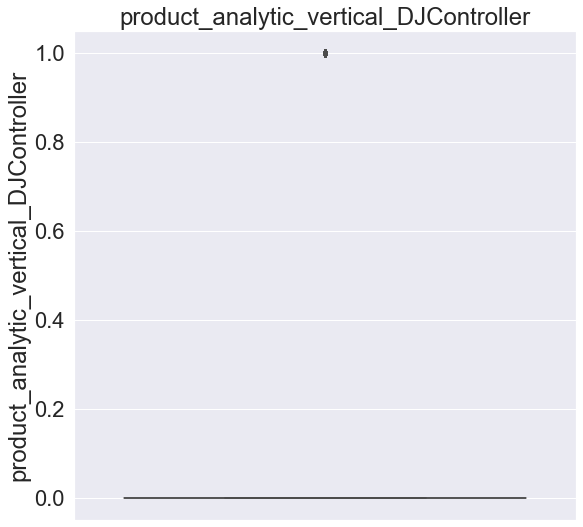

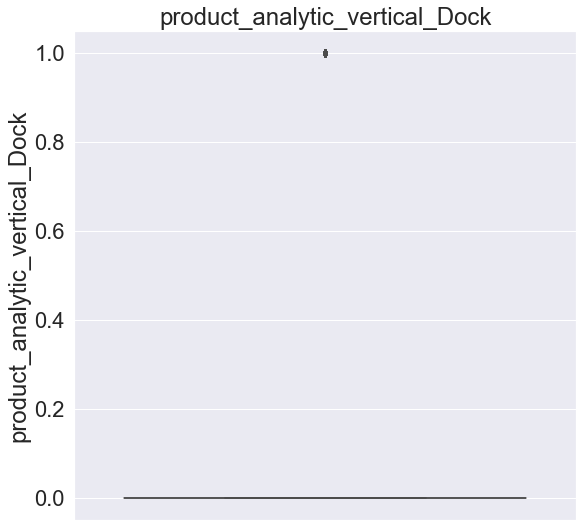

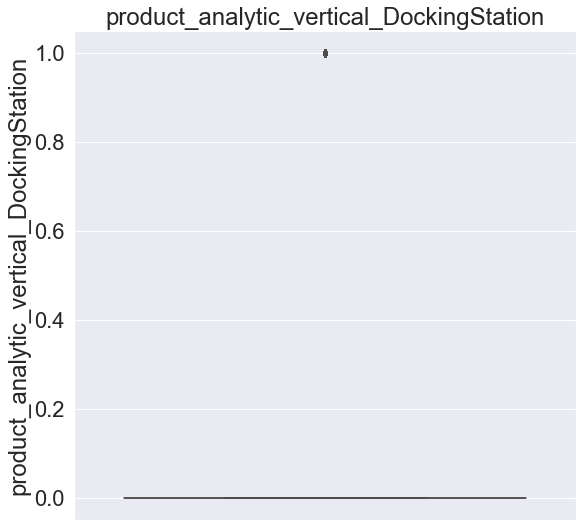

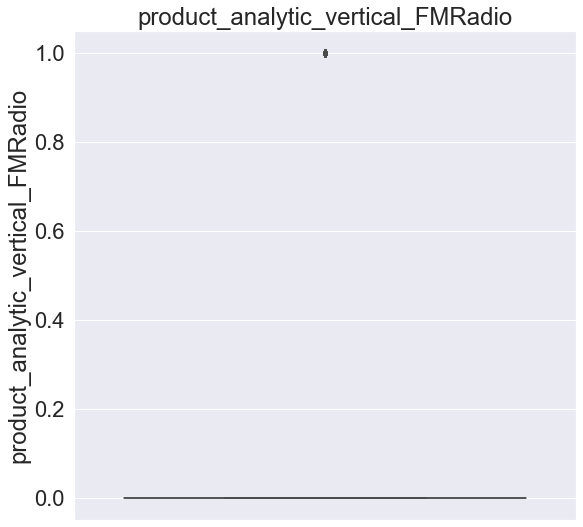

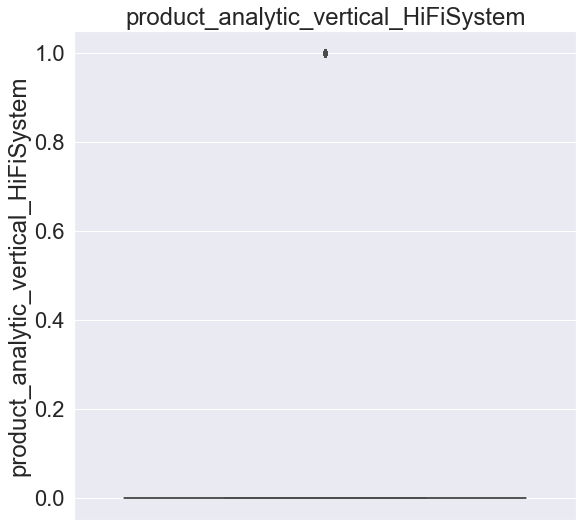

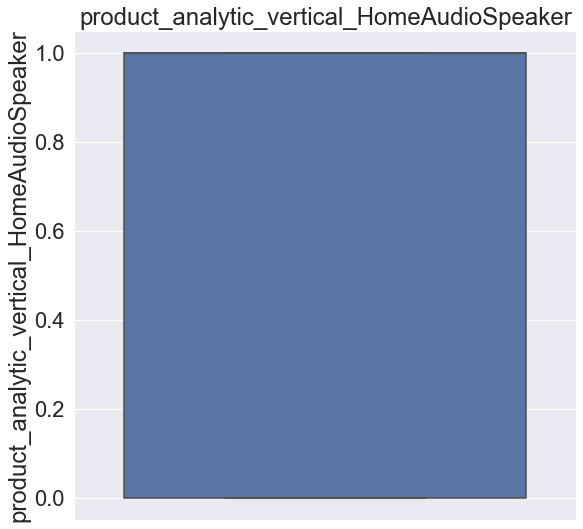

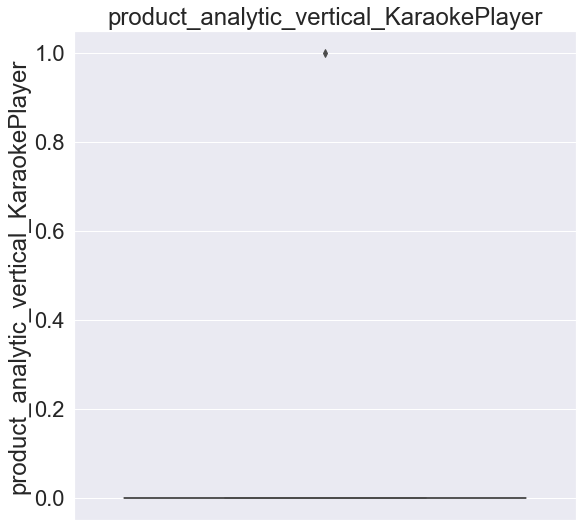

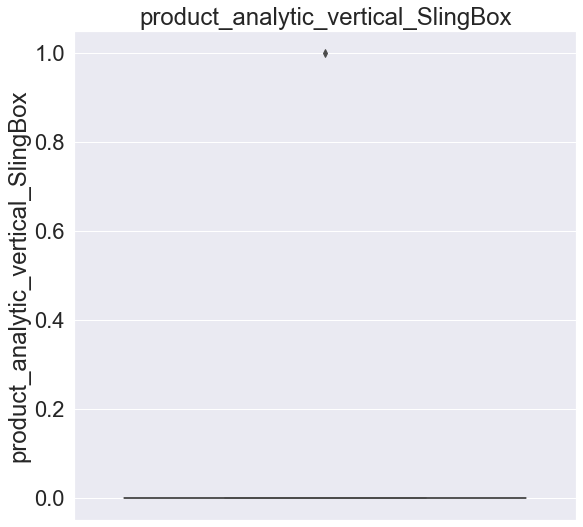

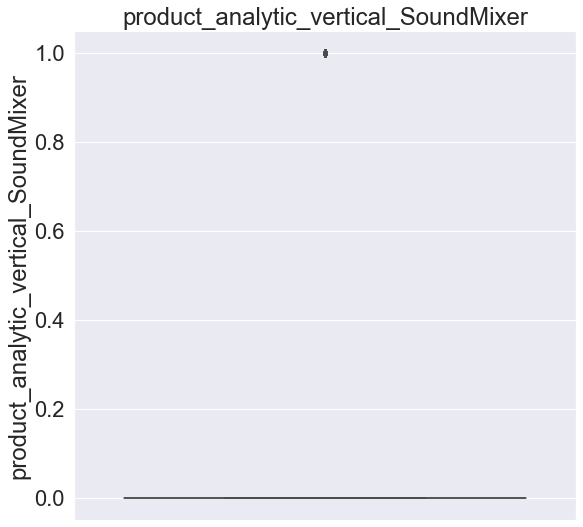

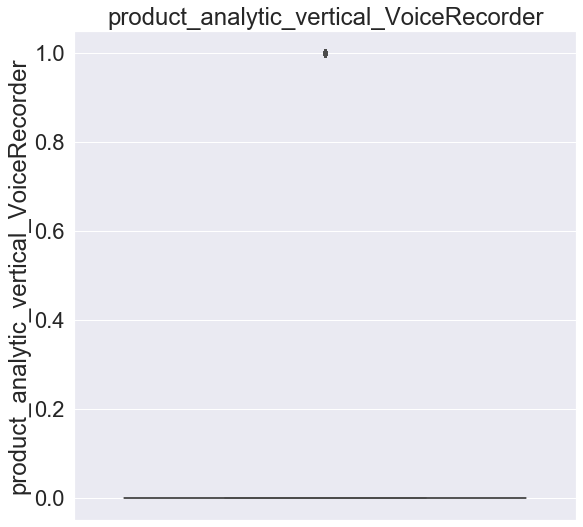

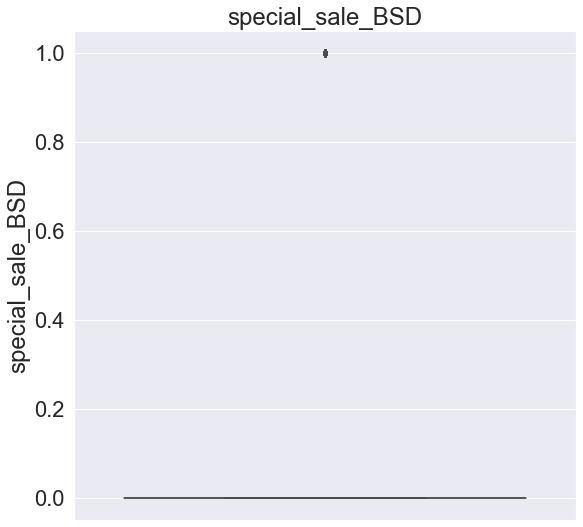

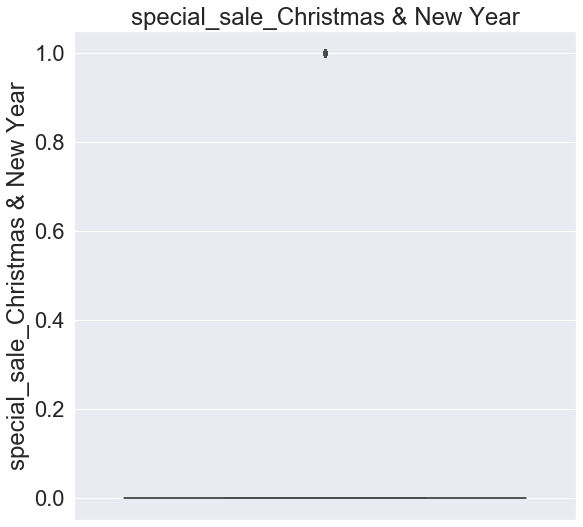

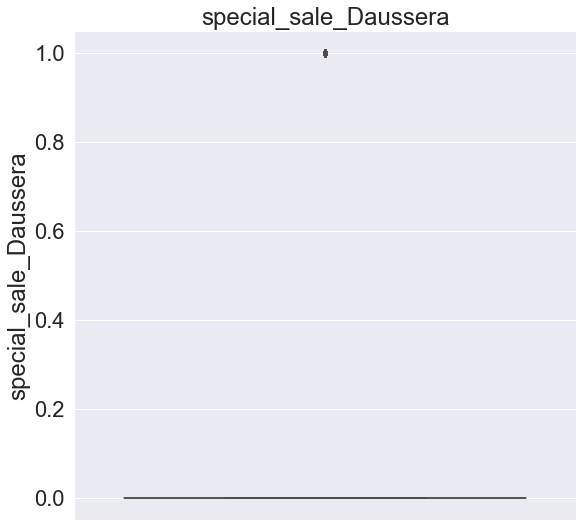

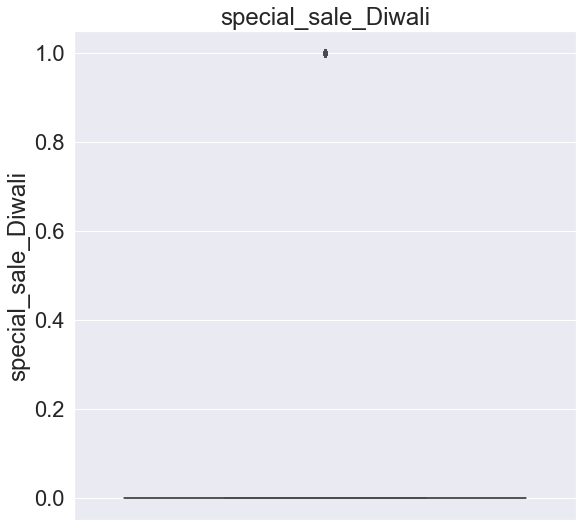

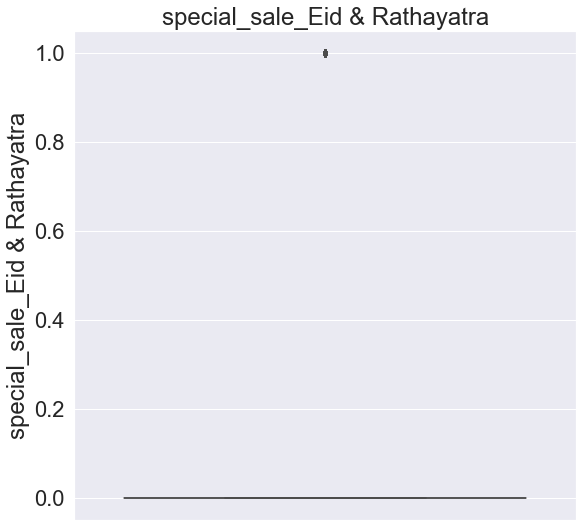

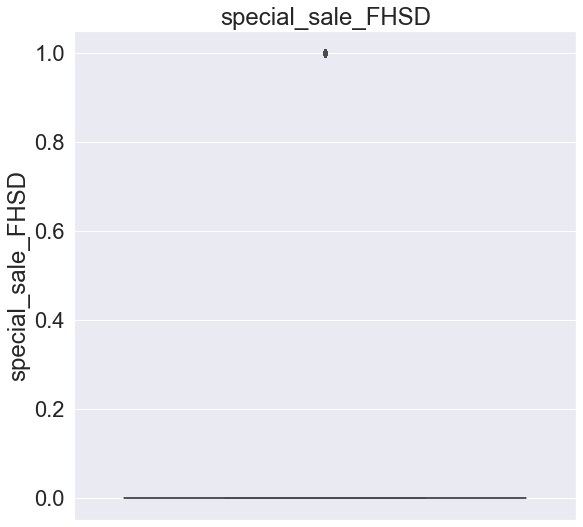

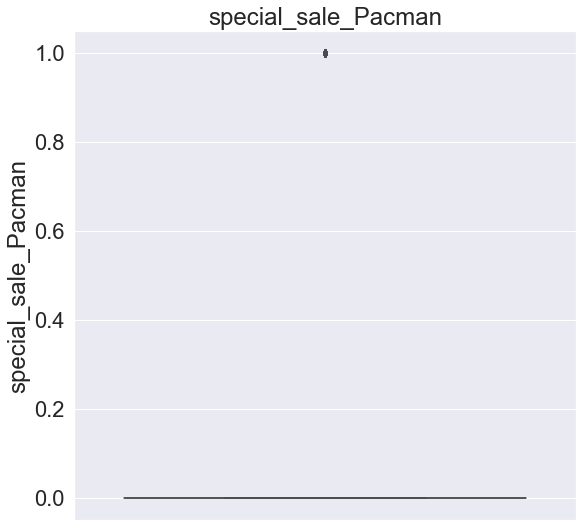

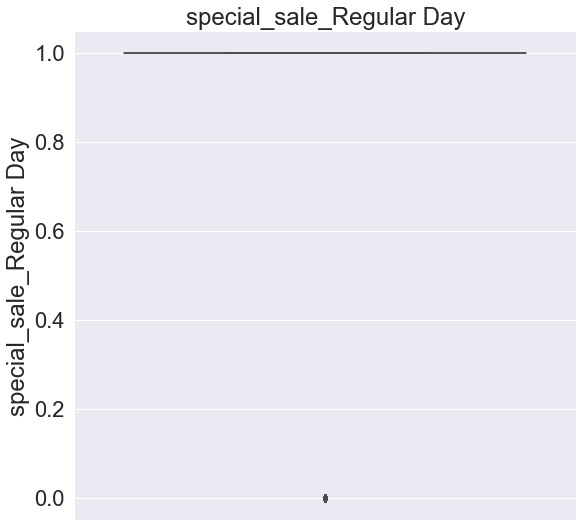

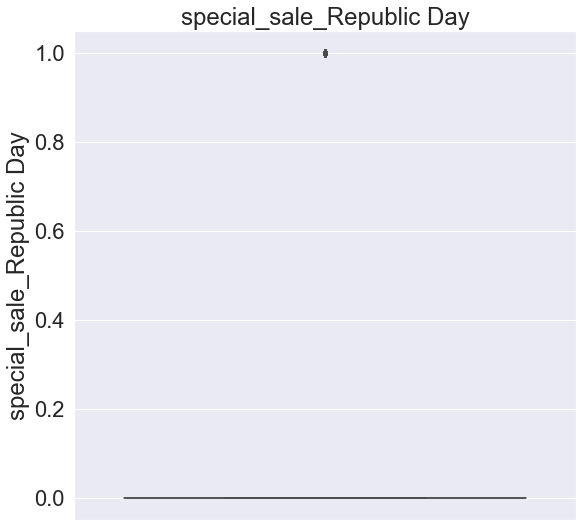

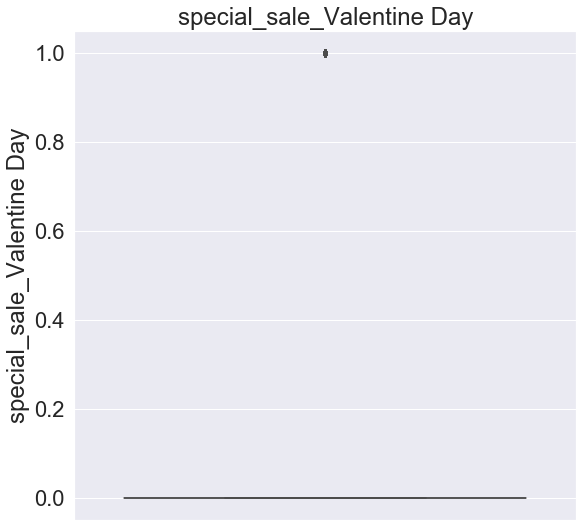

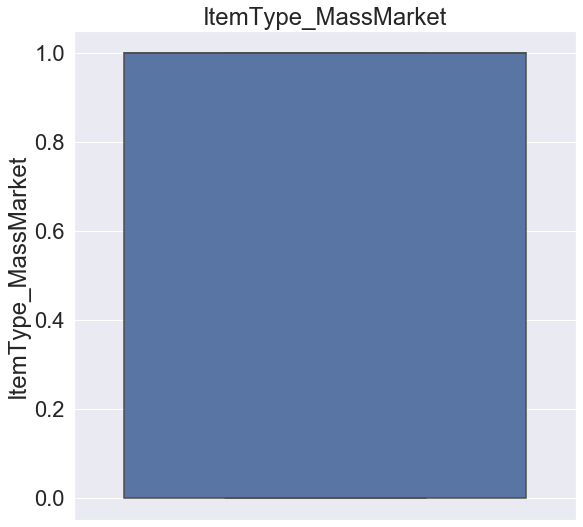

In [28]:
for col in list(ha.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ha, y=col).set_title(col)

In [29]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [30]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [31]:
for col in outlier_cols:
        remove_outlier(ha, col)

In [32]:
ha.shape

(62116, 48)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(ha, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 48 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   week                                        62116 non-null  int64  
 8   Pay_Day                                     62116 non-null  int64  
 9   is_holiday                                  62116 non-null  int64  
 10  Discount_P

In [38]:
ha['gmv'].unique()

array([6255., 6850., 6700., ..., 4895., 4775., 9600.])

In [39]:
# Create a list of the variables that you need to scale
varlist1 = ['gmv', 'units', 'deliverycdays', 'sla','product_mrp', 'product_procurement_sla', 'wday', 'week',
           'Discount_Percentage', 'delivery_on_time', 'Total Investment', 'TV',
           'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other', 'Affiliates', 'NPS',
           'NPSScore', 'holiday_count', 'Pay_Day', 'is_holiday']

# 'Pay_Day', 'is_holiday'

In [40]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [41]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,week,Pay_Day,is_holiday,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
62022,0.00,0.00,0.00,0.23,0.01,0.29,1.00,0.19,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1
61776,0.02,0.00,0.00,0.10,0.02,0.07,0.17,0.15,1.00,0.00,...,0,0,0,0,0,0,1,0,0,1
26367,0.03,0.00,0.00,0.13,0.03,0.36,0.17,0.92,1.00,0.00,...,0,0,0,0,0,0,1,0,0,1
41294,0.02,0.00,0.00,0.18,0.02,0.07,0.67,1.00,1.00,1.00,...,1,0,0,0,0,0,0,0,0,1
58467,0.01,0.00,0.00,0.20,0.01,0.21,0.00,0.15,0.00,0.00,...,0,0,0,0,0,0,1,0,0,1


In [42]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.60685294e-01 -6.30212501e-02  1.63860770e-01  6.23503274e-01
 -5.55913919e-02  2.32586398e-05 -9.07206977e-05  3.14690646e-04
 -4.49109312e-04 -3.77803924e-02 -1.56497093e-01  6.08280262e+02
  3.07373588e+00  1.16340825e+02 -3.01954782e+02 -8.80752692e+00
 -2.67479825e+01 -3.01803744e+02  1.53194305e-05 -2.03761867e+02
 -8.56840218e+01  1.73090203e-01  2.45448405e-07  2.55076813e-08
 -1.74997173e-04  9.44921061e-04  4.70972504e-02 -3.51803845e-03
 -6.52696087e-03 -6.67145795e-03  3.23292149e-03 -4.03320436e-03
  4.18452008e-02 -6.29398379e-03  3.04421099e-02  1.36790251e-03
 -1.42895186e-04  5.58411607e-04  1.00142571e-03  6.23423804e-04
  9.29154769e-04  1.40287553e-03 -1.65787151e-03  1.68737464e-04
  1.25291647e-03  5.67275721e-04 -7.00399914e-03]
-13.203278293700032


In [45]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True  True False False False False  True  True  True
 False  True  True False  True False False  True False False False False
 False False  True False False False False False  True False  True False
 False False False False False False False False False False False]
[ 1  1  1  1  1 30 27 25 28  1  1  1  3  1  1  4  1  2 31  1 11 12 32 33
 26 16  1 10  8  7 14  9  1  6  1 15 29 24 19 23 20 17 13 22 18 21  5]


In [46]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,deliverycdays,sla,product_mrp,product_procurement_sla,Discount_Percentage,delivery_on_time,Total Investment,Digital,Sponsorship,Online marketing,Other,product_analytic_vertical_DJController,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SoundMixer
62022,1.00,0.00,0.00,0.23,0.01,0.29,0.42,0.13,0.58,0.14,0.48,0.76,0.59,0,0,0
61776,1.00,0.00,0.00,0.10,0.02,0.07,0.25,0.08,0.58,0.14,0.48,0.76,0.59,0,0,0
26367,1.00,0.00,0.00,0.13,0.03,0.36,0.22,0.00,0.62,0.21,0.67,0.92,0.00,0,0,0
41294,1.00,0.00,0.00,0.18,0.02,0.07,0.24,0.15,0.42,0.00,0.04,0.94,1.00,0,0,0
58467,1.00,0.00,0.00,0.20,0.01,0.21,0.22,0.13,0.28,0.13,0.14,0.87,0.00,0,0,0


In [47]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:48:33   Log-Likelihood:             1.2819e+05
No. Observations:               43481   AIC:                        -2.563e+05
Df Residuals:                   43465   BIC:                        -2.562e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,delivery_on_time,"12,943.14"
3,sla,"12,580.95"
5,product_procurement_sla,"3,163.45"
8,Total Investment,"3,041.98"
10,Sponsorship,"1,413.13"
9,Digital,237.99
12,Other,175.68
11,Online marketing,142.87
2,deliverycdays,100.29
0,const,36.45


In [51]:
X_train_rfe1 = X_train_rfe1.drop('delivery_on_time', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:50:07   Log-Likelihood:             1.2818e+05
No. Observations:               43481   AIC:                        -2.563e+05
Df Residuals:                   43466   BIC:                        -2.562e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0175      0.000     47.615      0.000       0.017       0.018
units                                       0.1597      0.004     40.139      0.000       0.152       0.167
deliverycdays                              -0.0003      0.004     -0.071      0.943      -0.007       0.007
sla                                        -0.0060      0.001     -6.128      0.000      -0.008      -0.004
product_mrp                                 0.6778      0.002    420.984      0.000       0.675       0.681
product_procurement_sla                     0.0077      0.001     11.563      0.000       0.006       0.009
Discount_Percentage                        -0.0407      0.000   -132.695      0.000      -0.041      -0.040
Total Investment                           -0.0372      0.011     -3.307      0.001      -0.059      -0.015
Digital                                     0.0067      0.003      2.647      0.008       0.002       0.012
Sponsorship                                 0.0221      0.006      3.482      0.000       0.010       0.035
Online marketing                            0.0082      0.003      3.129      0.002       0.003       0.013
Other                                       0.0074      0.002      3.299      0.001       0.003       0.012
product_analytic_vertical_DJController      0.0463      0.002     26.460      0.000       0.043       0.050
product_analytic_vertical_KaraokePlayer     0.0461      0.013      3.634      0.000       0.021       0.071
product_analytic_vertical_SoundMixer        0.0344      0.003     12.377      0.000       0.029       0.040
==============================================================================
Omnibus:                    31820.278   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         98492224.720
Skew:                          -1.919   Prob(JB):                         0.00
Kurtosis:                     236.130   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Total Investment,"3,041.87"
9,Sponsorship,"1,413.08"
8,Digital,237.98
11,Other,175.67
10,Online marketing,142.86
0,const,36.43
3,sla,1.12
4,product_mrp,1.10
6,Discount_Percentage,1.07
5,product_procurement_sla,1.06


In [53]:
# X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:51:05   Log-Likelihood:             1.2818e+05
No. Observations:               43481   AIC:                        -2.563e+05
Df Residuals:                   43467   BIC:                        -2.562e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0182      0.000     62.461      0.000       0.018       0.019
units                                       0.1597      0.004     40.137      0.000       0.152       0.168
deliverycdays                              -0.0002      0.004     -0.045      0.964      -0.007       0.007
sla                                        -0.0062      0.001     -6.266      0.000      -0.008      -0.004
product_mrp                                 0.6777      0.002    420.939      0.000       0.675       0.681
product_procurement_sla                     0.0077      0.001     11.567      0.000       0.006       0.009
Discount_Percentage                        -0.0407      0.000   -132.661      0.000      -0.041      -0.040
Digital                                    -0.0016      0.000     -4.457      0.000      -0.002      -0.001
Sponsorship                                 0.0012      0.000      2.954      0.003       0.000       0.002
Online marketing                           -0.0004      0.000     -1.542      0.123      -0.001       0.000
Other                                    1.212e-05      0.000      0.062      0.951      -0.000       0.000
product_analytic_vertical_DJController      0.0464      0.002     26.503      0.000       0.043       0.050
product_analytic_vertical_KaraokePlayer     0.0461      0.013      3.631      0.000       0.021       0.071
product_analytic_vertical_SoundMixer        0.0345      0.003     12.416      0.000       0.029       0.040
==============================================================================
Omnibus:                    31701.615   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         98633805.939
Skew:                          -1.903   Prob(JB):                         0.00
Kurtosis:                     236.298   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,22.99
8,Sponsorship,5.36
7,Digital,4.71
9,Online marketing,1.54
10,Other,1.35
3,sla,1.12
4,product_mrp,1.10
6,Discount_Percentage,1.07
5,product_procurement_sla,1.06
11,product_analytic_vertical_DJController,1.03


In [55]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.619e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:51:48   Log-Likelihood:                      1.2631e+05
No. Observations:               43481   AIC:                                 -2.526e+05
Df Residuals:                   43468   BIC:                                 -2.525e+05
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1607      0.004     38.693      0.000       0.153       0.169
deliverycdays                               0.0027      0.004      0.689      0.491      -0.005       0.010
sla                                         0.0277      0.001     32.391      0.000       0.026       0.029
product_mrp                                 0.6910      0.002    414.820      0.000       0.688       0.694
product_procurement_sla                     0.0187      0.001     27.771      0.000       0.017       0.020
Discount_Percentage                        -0.0336      0.000   -112.931      0.000      -0.034      -0.033
Digital                                    -0.0024      0.000     -6.407      0.000      -0.003      -0.002
Sponsorship                                 0.0011      0.000      2.584      0.010       0.000       0.002
Online marketing                            0.0093      0.000     39.989      0.000       0.009       0.010
Other                                       0.0002      0.000      0.768      0.442      -0.000       0.001
product_analytic_vertical_DJController      0.0458      0.002     25.061      0.000       0.042       0.049
product_analytic_vertical_KaraokePlayer     0.0525      0.013      3.964      0.000       0.027       0.079
product_analytic_vertical_SoundMixer        0.0350      0.003     12.069      0.000       0.029       0.041
==============================================================================
Omnibus:                    37187.052   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83186664.892
Skew:                          -2.726   Prob(JB):                         0.00
Kurtosis:                     217.211   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Sponsorship,12.71
8,Online marketing,9.60
6,Digital,7.86
2,sla,4.56
5,Discount_Percentage,4.23
4,product_procurement_sla,4.01
3,product_mrp,1.89
9,Other,1.77
10,product_analytic_vertical_DJController,1.03
0,units,1.01


In [57]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Digital', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                          2.835e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:52:29   Log-Likelihood:                      1.2629e+05
No. Observations:               43481   AIC:                                 -2.526e+05
Df Residuals:                   43469   BIC:                                 -2.525e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1607      0.004     38.670      0.000       0.153       0.169
deliverycdays                               0.0038      0.004      0.993      0.321      -0.004       0.011
sla                                         0.0273      0.001     32.000      0.000       0.026       0.029
product_mrp                                 0.6907      0.002    414.614      0.000       0.687       0.694
product_procurement_sla                     0.0188      0.001     27.923      0.000       0.017       0.020
Discount_Percentage                        -0.0336      0.000   -112.830      0.000      -0.034      -0.033
Sponsorship                                -0.0011      0.000     -4.982      0.000      -0.002      -0.001
Online marketing                            0.0096      0.000     41.671      0.000       0.009       0.010
Other                                       0.0003      0.000      1.578      0.115   -7.78e-05       0.001
product_analytic_vertical_DJController      0.0458      0.002     25.070      0.000       0.042       0.049
product_analytic_vertical_KaraokePlayer     0.0521      0.013      3.929      0.000       0.026       0.078
product_analytic_vertical_SoundMixer        0.0354      0.003     12.201      0.000       0.030       0.041
==============================================================================
Omnibus:                    36999.899   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         83172902.176
Skew:                          -2.698   Prob(JB):                         0.00
Kurtosis:                     217.195   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Online marketing,9.32
2,sla,4.54
5,Discount_Percentage,4.23
4,product_procurement_sla,4.01
6,Sponsorship,3.88
3,product_mrp,1.88
8,Other,1.74
9,product_analytic_vertical_DJController,1.03
0,units,1.01
1,deliverycdays,1.00


In [59]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                          2.958e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:53:42   Log-Likelihood:                      1.2544e+05
No. Observations:               43481   AIC:                                 -2.509e+05
Df Residuals:                   43470   BIC:                                 -2.508e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1627      0.004     38.398      0.000       0.154       0.171
deliverycdays                               0.0026      0.004      0.662      0.508      -0.005       0.010
sla                                         0.0370      0.001     44.169      0.000       0.035       0.039
product_mrp                                 0.6954      0.002    410.328      0.000       0.692       0.699
product_procurement_sla                     0.0232      0.001     34.109      0.000       0.022       0.024
Discount_Percentage                        -0.0293      0.000   -102.863      0.000      -0.030      -0.029
Sponsorship                                 0.0048      0.000     27.097      0.000       0.004       0.005
Other                                       0.0043      0.000     23.438      0.000       0.004       0.005
product_analytic_vertical_DJController      0.0448      0.002     24.030      0.000       0.041       0.048
product_analytic_vertical_KaraokePlayer     0.0547      0.014      4.044      0.000       0.028       0.081
product_analytic_vertical_SoundMixer        0.0354      0.003     11.975      0.000       0.030       0.041
==============================================================================
Omnibus:                    39674.361   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         80155367.200
Skew:                          -3.128   Prob(JB):                         0.00
Kurtosis:                     213.247   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,sla,4.20
4,product_procurement_sla,3.92
5,Discount_Percentage,3.73
6,Sponsorship,2.33
3,product_mrp,1.87
7,Other,1.36
8,product_analytic_vertical_DJController,1.03
0,units,1.01
1,deliverycdays,1.00
9,product_analytic_vertical_KaraokePlayer,1.00


In [61]:
X_train_rfe1 = X_train_rfe1.drop('sla', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                          3.096e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:54:22   Log-Likelihood:                      1.2448e+05
No. Observations:               43481   AIC:                                 -2.489e+05
Df Residuals:                   43471   BIC:                                 -2.489e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1651      0.004     38.128      0.000       0.157       0.174
deliverycdays                               0.0117      0.004      2.934      0.003       0.004       0.020
product_mrp                                 0.6932      0.002    400.326      0.000       0.690       0.697
product_procurement_sla                     0.0390      0.001     66.105      0.000       0.038       0.040
Discount_Percentage                        -0.0261      0.000    -92.648      0.000      -0.027      -0.026
Sponsorship                                 0.0067      0.000     37.837      0.000       0.006       0.007
Other                                       0.0055      0.000     29.643      0.000       0.005       0.006
product_analytic_vertical_DJController      0.0446      0.002     23.419      0.000       0.041       0.048
product_analytic_vertical_KaraokePlayer     0.0528      0.014      3.823      0.000       0.026       0.080
product_analytic_vertical_SoundMixer        0.0376      0.003     12.451      0.000       0.032       0.044
==============================================================================
Omnibus:                    38408.705   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         72444603.254
Skew:                          -2.948   Prob(JB):                         0.00
Kurtosis:                     202.880   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Discount_Percentage,3.48
3,product_procurement_sla,2.83
5,Sponsorship,2.20
2,product_mrp,1.87
6,Other,1.33
7,product_analytic_vertical_DJController,1.03
0,units,1.01
1,deliverycdays,1.00
8,product_analytic_vertical_KaraokePlayer,1.00
9,product_analytic_vertical_SoundMixer,1.00


In [63]:
X_train_rfe1 = X_train_rfe1.drop('Discount_Percentage', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.853
Method:                 Least Squares   F-statistic:                          2.793e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:55:26   Log-Likelihood:                      1.2057e+05
No. Observations:               43481   AIC:                                 -2.411e+05
Df Residuals:                   43472   BIC:                                 -2.410e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1578      0.005     33.291      0.000       0.148       0.167
deliverycdays                               0.0033      0.004      0.748      0.454      -0.005       0.012
product_mrp                                 0.6402      0.002    357.981      0.000       0.637       0.644
product_procurement_sla                     0.0161      0.001     27.525      0.000       0.015       0.017
Sponsorship                                 0.0007      0.000      3.744      0.000       0.000       0.001
Other                                       0.0014      0.000      7.254      0.000       0.001       0.002
product_analytic_vertical_DJController      0.0561      0.002     26.960      0.000       0.052       0.060
product_analytic_vertical_KaraokePlayer     0.0658      0.015      4.351      0.000       0.036       0.095
product_analytic_vertical_SoundMixer        0.0449      0.003     13.569      0.000       0.038       0.051
==============================================================================
Omnibus:                    18724.990   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45521226.682
Skew:                          -0.195   Prob(JB):                         0.00
Kurtosis:                     161.512   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,product_procurement_sla,2.33
4,Sponsorship,1.90
2,product_mrp,1.67
5,Other,1.26
6,product_analytic_vertical_DJController,1.02
0,units,1.01
1,deliverycdays,1.00
7,product_analytic_vertical_KaraokePlayer,1.00
8,product_analytic_vertical_SoundMixer,1.00


In [65]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.852
Method:                 Least Squares   F-statistic:                          3.141e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:56:32   Log-Likelihood:                      1.2056e+05
No. Observations:               43481   AIC:                                 -2.411e+05
Df Residuals:                   43473   BIC:                                 -2.410e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1581      0.005     33.378      0.000       0.149       0.167
deliverycdays                               0.0033      0.004      0.765      0.444      -0.005       0.012
product_mrp                                 0.6418      0.002    370.712      0.000       0.638       0.645
product_procurement_sla                     0.0173      0.001     34.404      0.000       0.016       0.018
Other                                       0.0013      0.000      6.727      0.000       0.001       0.002
product_analytic_vertical_DJController      0.0557      0.002     26.803      0.000       0.052       0.060
product_analytic_vertical_KaraokePlayer     0.0662      0.015      4.379      0.000       0.037       0.096
product_analytic_vertical_SoundMixer        0.0447      0.003     13.516      0.000       0.038       0.051
==============================================================================
Omnibus:                    19019.767   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45591737.911
Skew:                          -0.284   Prob(JB):                         0.00
Kurtosis:                     161.634   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,product_procurement_sla,1.71
2,product_mrp,1.56
4,Other,1.22
5,product_analytic_vertical_DJController,1.02
0,units,1.00
1,deliverycdays,1.00
6,product_analytic_vertical_KaraokePlayer,1.00
7,product_analytic_vertical_SoundMixer,1.00


In [67]:
X_train_rfe1 = X_train_rfe1.drop('product_mrp', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.386
Method:                 Least Squares   F-statistic:                              3909.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:57:33   Log-Likelihood:                          89562.
No. Observations:               43481   AIC:                                 -1.791e+05
Df Residuals:                   43474   BIC:                                 -1.790e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1427      0.010     14.763      0.000       0.124       0.162
deliverycdays                               0.0213      0.009      2.381      0.017       0.004       0.039
product_procurement_sla                     0.1163      0.001    134.222      0.000       0.115       0.118
Other                                       0.0060      0.000     15.026      0.000       0.005       0.007
product_analytic_vertical_DJController      0.1579      0.004     37.557      0.000       0.150       0.166
product_analytic_vertical_KaraokePlayer     0.1235      0.031      4.004      0.000       0.063       0.184
product_analytic_vertical_SoundMixer        0.1139      0.007     16.918      0.000       0.101       0.127
==============================================================================
Omnibus:                    56117.259   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17834807.024
Skew:                           7.025   Prob(JB):                         0.00
Kurtosis:                     101.218   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,product_procurement_sla,1.22
3,Other,1.22
0,units,1.00
1,deliverycdays,1.00
4,product_analytic_vertical_DJController,1.00
5,product_analytic_vertical_KaraokePlayer,1.00
6,product_analytic_vertical_SoundMixer,1.00


In [69]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

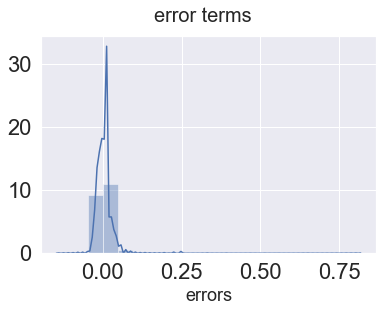

In [70]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [71]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [72]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [73]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [74]:
X_test_rfe2.columns

Index(['units', 'deliverycdays', 'sla', 'product_mrp',
       'product_procurement_sla', 'Discount_Percentage', 'delivery_on_time',
       'Total Investment', 'Digital', 'Sponsorship', 'Online marketing',
       'Other', 'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SoundMixer'],
      dtype='object')

In [75]:
X_train_rfe1.columns

Index(['units', 'deliverycdays', 'product_procurement_sla', 'Other',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SoundMixer'],
      dtype='object')

In [76]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [77]:
X_test_rfe2.columns

Index(['units', 'deliverycdays', 'product_procurement_sla', 'Other',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SoundMixer'],
      dtype='object')

In [78]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18635 entries, 44315 to 1387
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    18635 non-null  float64
 1   deliverycdays                            18635 non-null  float64
 2   product_procurement_sla                  18635 non-null  float64
 3   Other                                    18635 non-null  float64
 4   product_analytic_vertical_DJController   18635 non-null  uint8  
 5   product_analytic_vertical_KaraokePlayer  18635 non-null  uint8  
 6   product_analytic_vertical_SoundMixer     18635 non-null  uint8  
dtypes: float64(4), uint8(3)
memory usage: 782.5 KB


In [79]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [80]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(18635, 7)
(43481, 7)


Text(0, 0.5, 'y_pred')

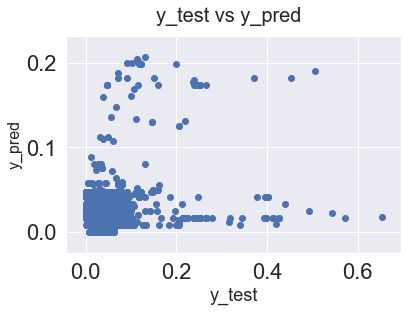

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [82]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.07776597801080598

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [84]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.02941954140495403

In [85]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [86]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
regr.score(X_test, y_test)

0.8463832204859135

In [88]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.84794915 0.81623703 0.82704163 0.81364937 0.83496558]
Mean and std deviation:  0.8279685535535191 0.012583399046792685


0.8463832204859135

In [89]:
accuracy

0.846551431195302

In [90]:
scores

array([0.84794915, 0.81623703, 0.82704163, 0.81364937, 0.83496558])

In [91]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8289351623662065
0.1


In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)